In [11]:
import numpy as np 
import pandas as pd

In [18]:

df = pd.read_csv('spam.csv', encoding='latin1')


In [15]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4658,ham,I cant pick the phone right now. Pls send a me...,NaN,NaN,NaN
2607,ham,:-) yeah! Lol. Luckily i didn't have a starrin...,NaN,NaN,NaN
2367,ham,V nice! Off 2 sheffield tom 2 air my opinions ...,NaN,NaN,NaN
4131,ham,Hi baby ive just got back from work and i was ...,NaN,NaN,NaN
2931,ham,Only 2% students solved this CAT question in '...,NaN,NaN,NaN


In [20]:
df.shape

(5572, 5)

In [22]:
# Data cleaning 
# EDA 
# Text Preprocessing 
# Model Building 
# Evaluation 
# Improvement 
# Website 
# Deployment 

## Data Cleaning 

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [24]:
#drop last 3 cols 

In [25]:
df.drop(columns = ['Unnamed: 2' , 'Unnamed: 3' , 'Unnamed: 4'], inplace = True)

In [27]:
df.sample(5)

,v1,v2
1297,ham,"K so am I, how much for an 8th? Fifty?"
1610,ham,I'll probably be around mu a lot
4476,ham,Oh :-)only 4 outside players allowed to play know
737,spam,Hi. Customer Loyalty Offer:The NEW Nokia6650 M...
2898,ham,"Aight, I should be there by 8 at the latest, p..."


In [28]:
#renaming the columns 

In [29]:
df.rename(columns = {'v1' : 'target' , 'v2' : 'text'}, inplace = True)

In [30]:
df.sample(5)

,target,text
4047,ham,Lol or I could just starve and lose a pound by...
1938,ham,Excellent! Are you ready to moan and scream in...
1376,ham,Auntie huai juan never pick up her phone
3533,ham,Good evening! How are you?
4552,ham,Sun ah... Thk mayb can if dun have anythin on....


In [32]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [34]:
df['target'] = encoder.fit_transform(df['target'])

In [35]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [36]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [37]:
#check for duplicate values 
df.duplicated().sum()

np.int64(403)

In [40]:
#remove duplicates
df = df.drop_duplicates(keep = 'first')

In [41]:
df.duplicated().sum()

np.int64(0)

In [42]:
df.shape

(5169, 2)

# EDA

In [43]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

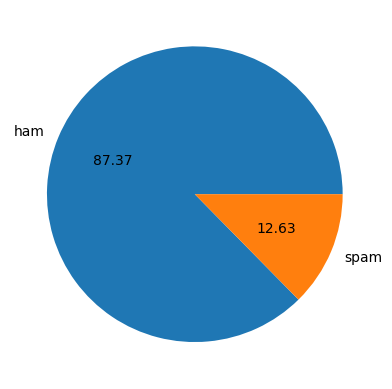

In [46]:
import matplotlib.pyplot as plt 
plt.pie(df['target'].value_counts(), labels = ['ham' , 'spam'] , autopct = "%0.2f")
plt.show()

In [50]:
import nltk

In [52]:
!pip install nltk


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [59]:
nltk.download('punkt')
nltk.download('punkt_tab') 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [55]:
df['num_characters'] = df['text'].apply(len)

C:\Users\HP\AppData\Local\Temp\ipykernel_16668\253964734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['text'].apply(len)


In [56]:
df['num_characters']

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: num_characters, Length: 5169, dtype: int64

In [63]:
#num of words
df['num_words']= df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [64]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [68]:
df['num_sentences'] =df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [69]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [70]:
df[['num_characters', 'num_words' , 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [76]:
#ham messages
df[df['target'] == 0][['num_characters', 'num_words' , 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [77]:
#spam messages
df[df['target'] == 1][['num_characters', 'num_words' , 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [80]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

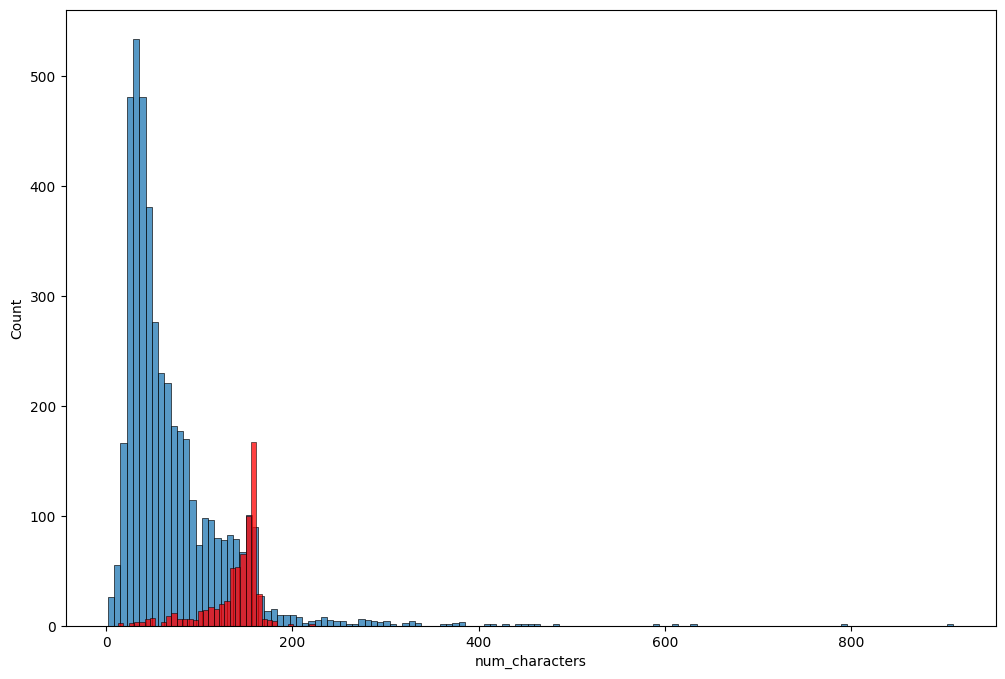

In [83]:
plt.figure(figsize =(12,8))
sns.histplot(df[df['target'] == 0  ]['num_characters'])
sns.histplot(df[df['target'] == 1  ]['num_characters'] , color = 'red')


<Axes: xlabel='num_words', ylabel='Count'>

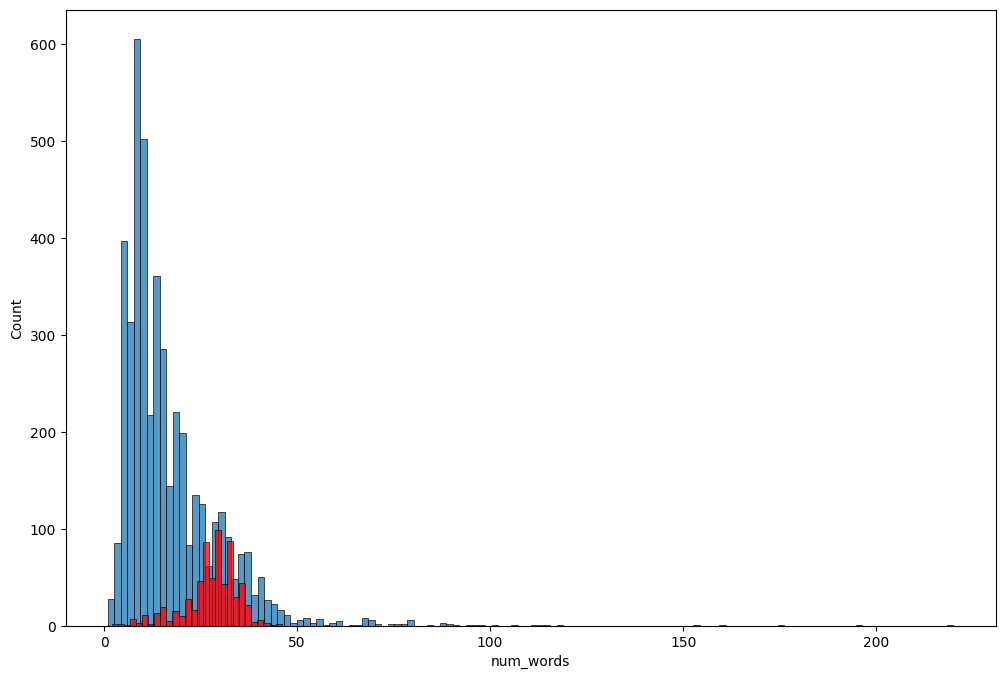

In [84]:
plt.figure(figsize =(12,8))
sns.histplot(df[df['target'] == 0  ]['num_words'])
sns.histplot(df[df['target'] == 1  ]['num_words'] , color = 'red')

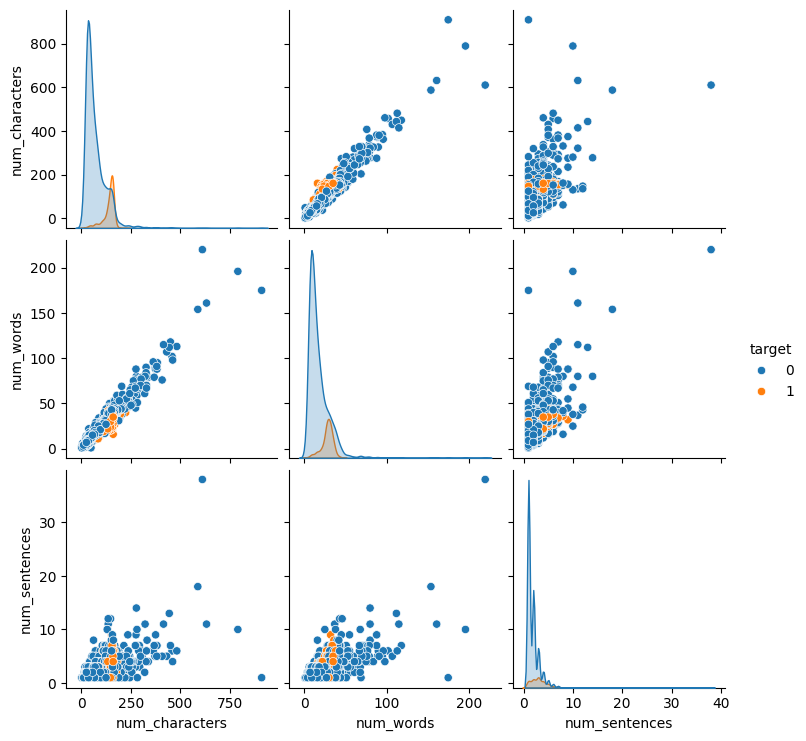

In [88]:
sns.pairplot(df,hue = 'target')

# Data Preprocessing

In [116]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation: 
            y.append(i)

    text  = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
        
            
    return " ".join(y)

In [101]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [103]:
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [117]:
transform_text('Hi How are %% you? Qirat?, are you still interested in machine learing program?')

'hi qirat still interest machin lear program'

In [104]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [108]:
from nltk.stem.porter import PorterStemmer

In [109]:
ps = PorterStemmer()

In [115]:
ps.stem("lovely")

'love'

In [121]:
df['transform_text'] = df['text'].apply(transform_text)

In [122]:
df.head()

,target,text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [129]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')

In [124]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [137]:
spam_wc = wc.generate(df[df['target'] == 1]['transform_text'].str.cat(sep = " "))

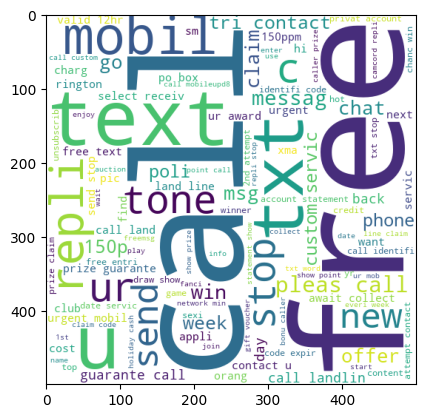

In [138]:
plt.imshow(spam_wc)

In [136]:
ham_wc = wc.generate(df[df['target'] == 0]['transform_text'].str.cat(sep = " "))

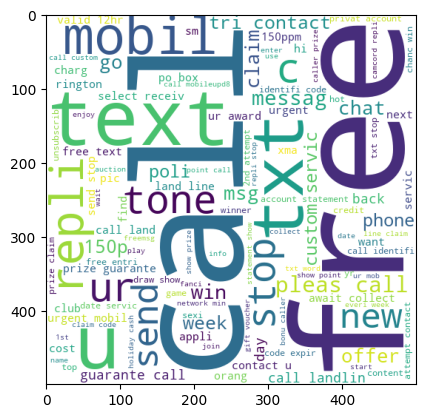

In [139]:
plt.imshow(ham_wc)

In [140]:
df.head()

,target,text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [147]:
spam_corpus = []
for msg in df[df['target'] == 1]['transform_text'].tolist():
    for word in msg.split(): 
        spam_corpus.append(word)

In [149]:
len(spam_corpus)

9939

In [150]:
from collections import Counter 

In [153]:
sns.barplot(pd.DataFrame(Counter(spam_corpus) .most_common(30))[0], pd.DataFrame(Counter(spam_corpus) .most_common(30))[1])

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

In [154]:
common_words = pd.DataFrame(Counter(spam_corpus).most_common(30))
common_words.columns = ['word', 'count']

<Axes: xlabel='word', ylabel='count'>

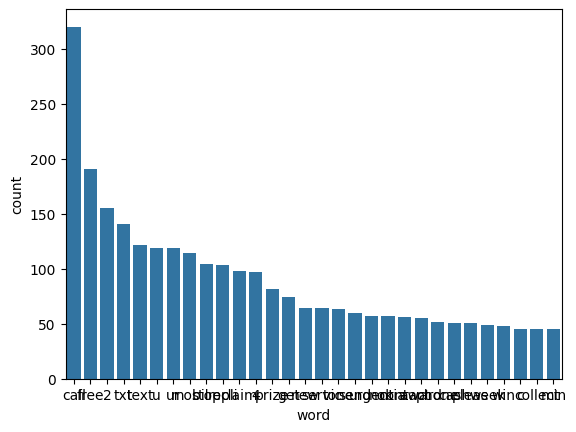

In [155]:
sns.barplot(x='word', y='count', data=common_words)

In [156]:
ham_corpus = []
for msg in df[df['target'] == 0]['transform_text'].tolist():
    for word in msg.split(): 
        ham_corpus.append(word)

In [157]:
len(ham_corpus)

35404

In [158]:
common_words = pd.DataFrame(Counter(ham_corpus).most_common(30))
common_words.columns = ['word', 'count']

<Axes: xlabel='word', ylabel='count'>

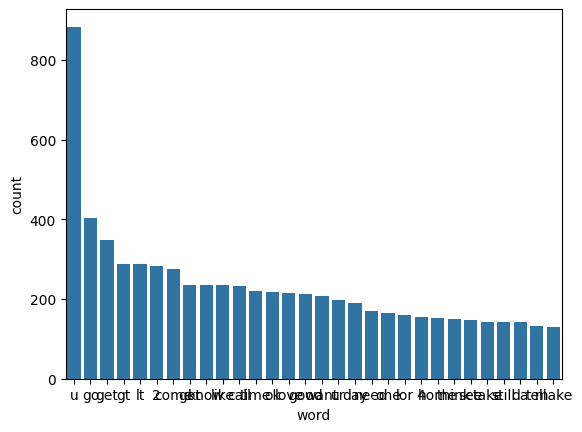

In [159]:
sns.barplot(x='word', y='count', data=common_words)

# Model Building